# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
data = pd.read_csv('/kaggle/input/hypertension-risk-prediction-dataset/hypertension_dataset.csv')

In [3]:
data.head(3)

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low


# Checking for missing values

In [4]:
data.isna().sum()

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

In [5]:
data['Hypertension'].unique()

array(['High', 'Low'], dtype=object)

# Number of People with high Hypertension by Country

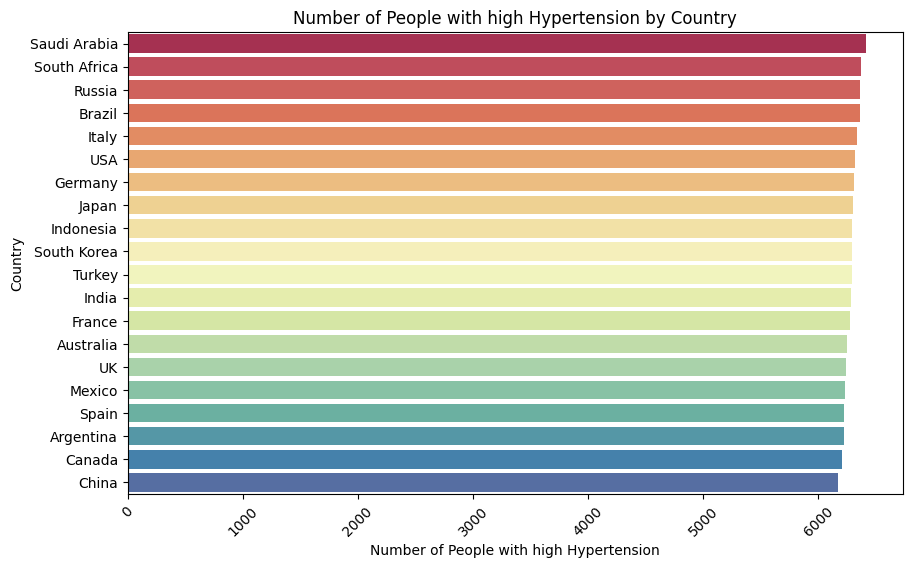

In [6]:
hyper_count = data[data['Hypertension'] == 'High'].groupby('Country').size().reset_index(name='count')
hyper_count = hyper_count.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=hyper_count, y='Country', x='count', palette='Spectral')
plt.title('Number of People with high Hypertension by Country')
plt.xlabel('Number of People with high Hypertension')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

# Number of People with high Hypertension by Physical Activity Level

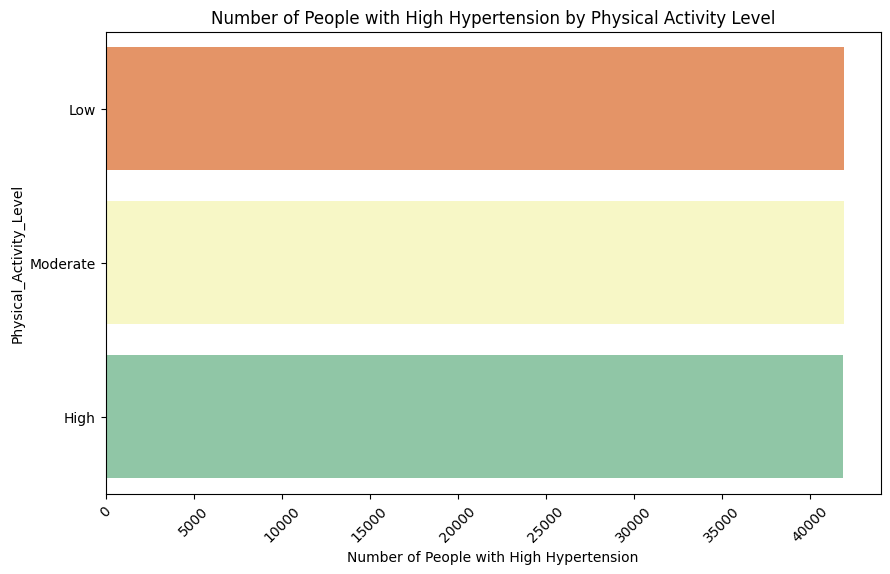

In [7]:
hyper_count = data[data['Hypertension'] == 'High'].groupby('Physical_Activity_Level').size().reset_index(name='count')
hyper_count = hyper_count.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=hyper_count, y='Physical_Activity_Level', x='count', palette='Spectral')
plt.title('Number of People with High Hypertension by Physical Activity Level')
plt.xlabel('Number of People with High Hypertension')
plt.ylabel('Physical_Activity_Level')
plt.xticks(rotation=45)
plt.show()

# Number of People with high Hypertension by Family History

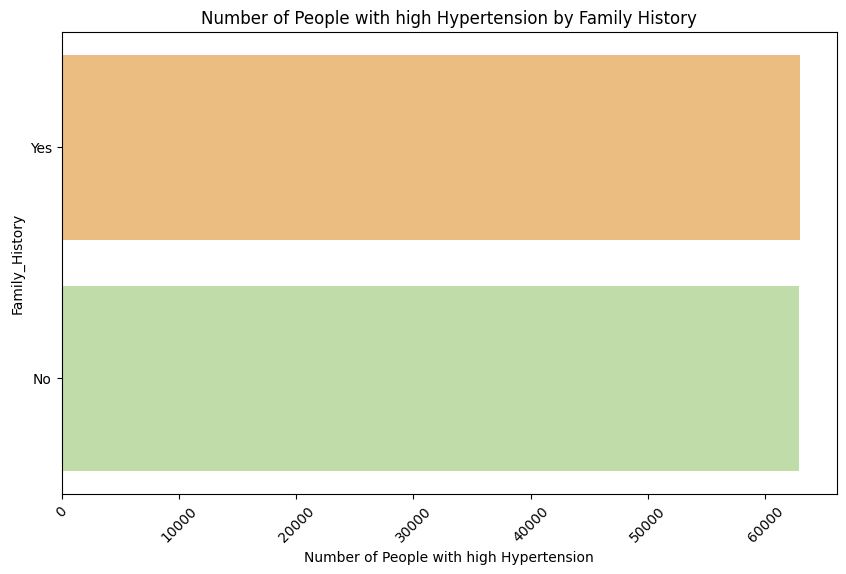

In [8]:
hyper_count = data[data['Hypertension'] == 'High'].groupby('Family_History').size().reset_index(name='count')
hyper_count = hyper_count.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=hyper_count, y='Family_History', x='count', palette='Spectral')
plt.title('Number of People with high Hypertension by Family History')
plt.xlabel('Number of People with high Hypertension')
plt.ylabel('Family_History')
plt.xticks(rotation=45)
plt.show()

# Triglycerides Distribution by Hypertension Status

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

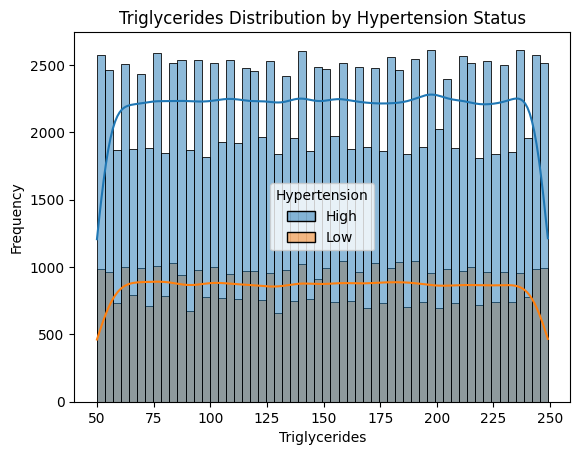

In [9]:
sns.histplot(data=data, x='Triglycerides', hue='Hypertension', kde=True)
plt.title('Triglycerides Distribution by Hypertension Status')
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


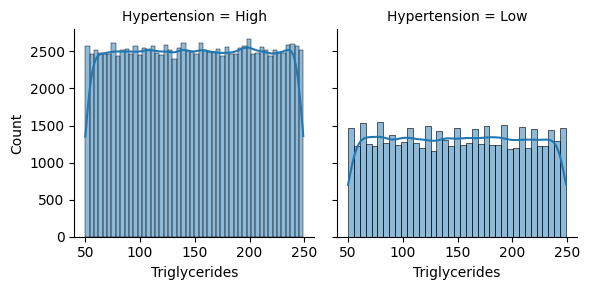

In [10]:
g = sns.FacetGrid(data, col='Hypertension')
g.map(sns.histplot, 'Triglycerides', kde=True)
plt.show()